In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

all_players_stats = pd.read_csv('All_players_stats.csv')
all_players_stats.head()

,Season,Gamecode,Home,Player_ID,IsStarter,IsPlaying,Team,Dorsal,Player,Minutes,...,FoulsReceived,Valuation,Plusminus,gamecode,group,datetime,TeamScore,OpponentScore,PlayerName,total_fp
0,2023,1,1,P004720,0.0,1.0,RED,2,"LAZAREVIC, STEFAN",5.07,...,0,1,-1.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,S. Lazarevic,1.1
1,2023,1,1,PJDR,0.0,1.0,RED,4,"TEODOSIC, MILOS",14.62,...,0,-1,6.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,M. Teodosic,-0.9
2,2023,1,1,P005099,0.0,1.0,RED,5,"HANGA, ADAM",22.35,...,3,9,4.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,A. Hanga,9.9
3,2023,1,1,P002553,0.0,1.0,RED,9,"MITROVIC, LUKA",21.53,...,4,14,20.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,L. Mitrovic,15.4
4,2023,1,1,PLUO,1.0,0.0,RED,10,"LAZIC, BRANKO",12.77,...,0,8,7.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,B. Lazic,8.8


### Univariate analysis

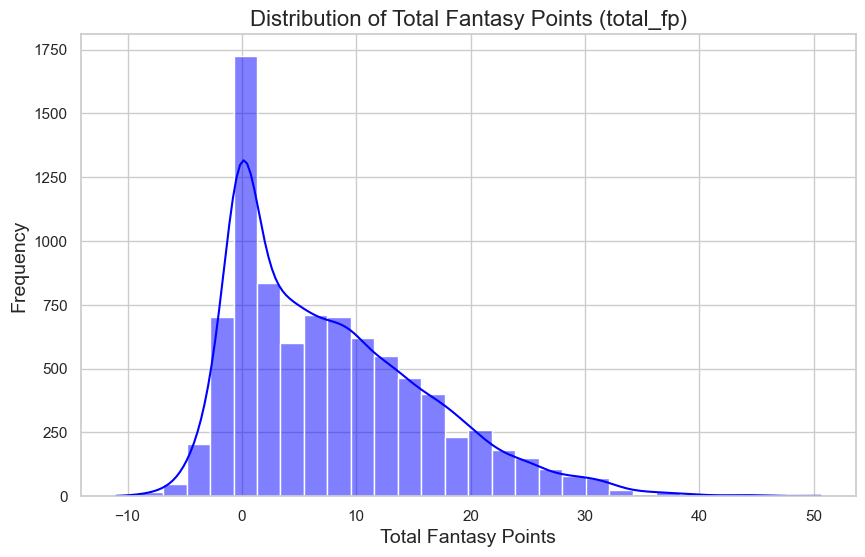

In [37]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the distribution of total_fp
sns.histplot(all_players_stats['total_fp'], bins=30, kde=True, color='blue')

# Add labels and title
plt.title('Distribution of Total Fantasy Points (total_fp)', fontsize=16)
plt.xlabel('Total Fantasy Points', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


### Bivariate analysis

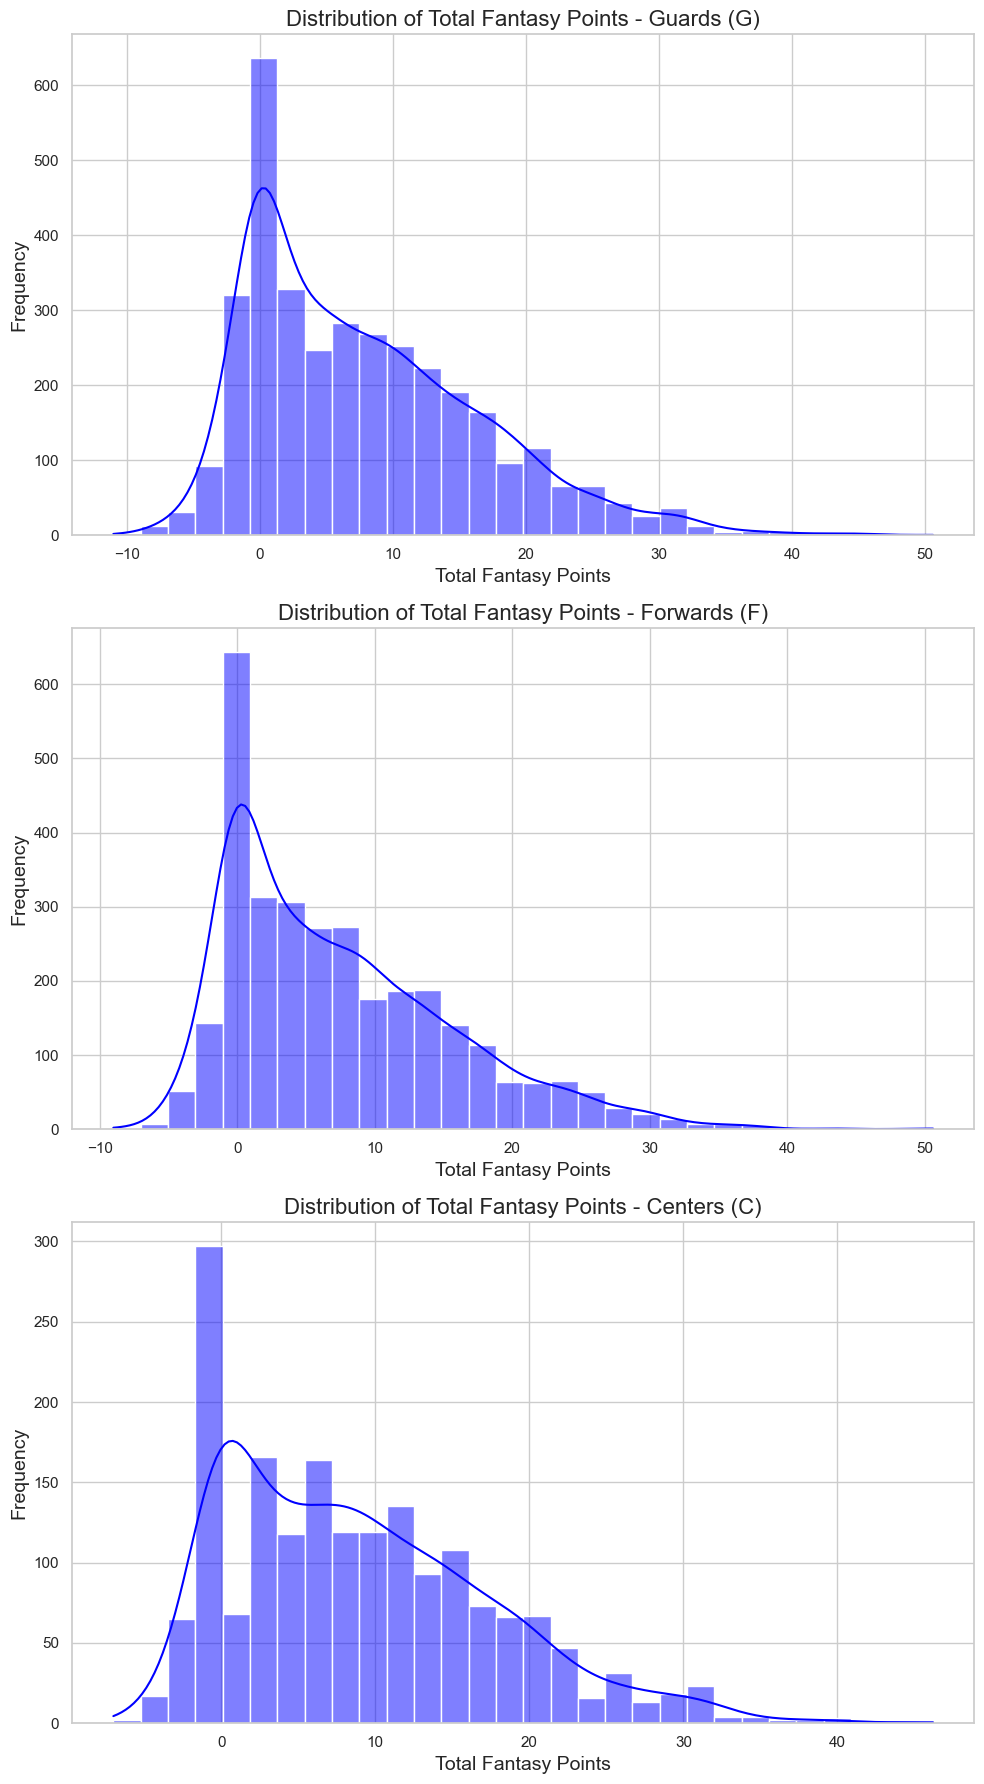

In [38]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create a 3x1 subplot for the histogram
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Define positions and corresponding titles
positions = ['G', 'F', 'C']
titles = ['Guards (G)', 'Forwards (F)', 'Centers (C)']

# Loop through positions and plot each distribution
for ax, pos, title in zip(axes, positions, titles):
    sns.histplot(all_players_stats[all_players_stats['Pos'] == pos]['total_fp'], 
                 bins=30, kde=True, color='blue', ax=ax)
    ax.set_title(f'Distribution of Total Fantasy Points - {title}', fontsize=16)
    ax.set_xlabel('Total Fantasy Points', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

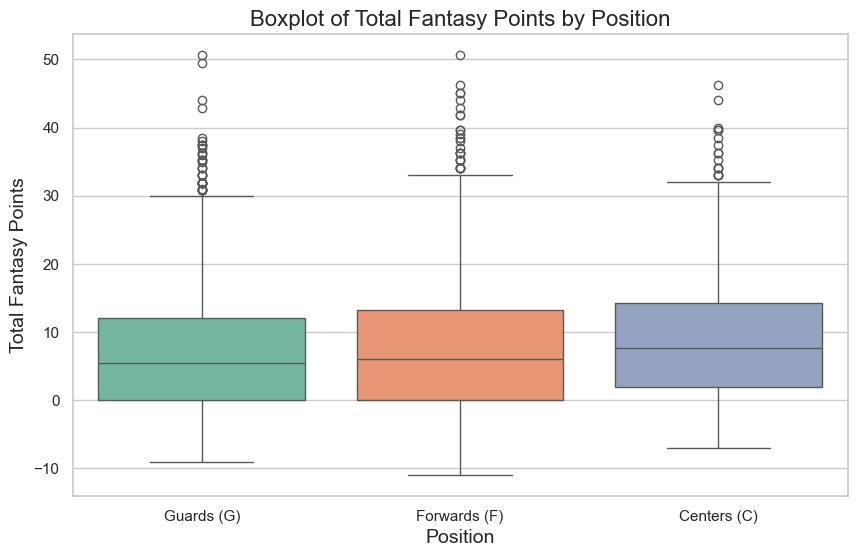

In [39]:
# Create a boxplot for total_fp across positions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pos', y='total_fp', data=all_players_stats, palette='Set2', hue='Pos', legend=False)
plt.title('Boxplot of Total Fantasy Points by Position', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Total Fantasy Points', fontsize=14)
plt.xticks(ticks=[0,1,2], labels=titles)
plt.show()

In [40]:
all_players_stats.columns

Index(['Season', 'Gamecode', 'Home', 'Player_ID', 'IsStarter', 'IsPlaying',
       'Team', 'Dorsal', 'Player', 'Minutes', 'Points', 'FieldGoalsMade2',
       'FieldGoalsAttempted2', 'FieldGoalsMade3', 'FieldGoalsAttempted3',
       'FreeThrowsMade', 'FreeThrowsAttempted', 'OffensiveRebounds',
       'DefensiveRebounds', 'TotalRebounds', 'Assistances', 'Steals',
       'Turnovers', 'BlocksFavour', 'BlocksAgainst', 'FoulsCommited',
       'FoulsReceived', 'Valuation', 'Plusminus', 'PlayerName', 'gamecode',
       'group', 'datetime', 'TeamScore', 'OpponentScore', 'Pos', 'total_fp'],
      dtype='object')

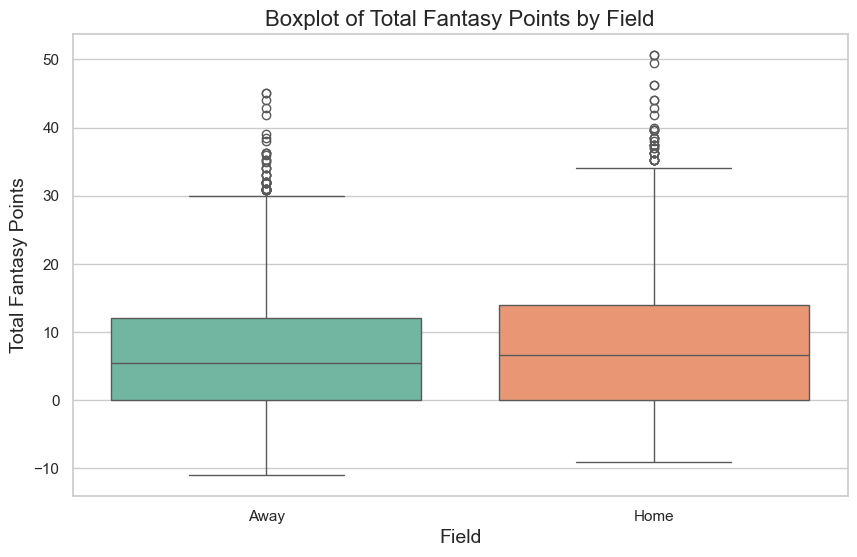

In [41]:
# Create a boxplot for total_fp across Home and Away matches
plt.figure(figsize=(10, 6))
sns.boxplot(x='Home', y='total_fp', data=all_players_stats, palette='Set2', hue='Home', legend=False)
plt.title('Boxplot of Total Fantasy Points by Field', fontsize=16)
plt.xlabel('Field', fontsize=14)
plt.ylabel('Total Fantasy Points', fontsize=14)
plt.xticks(ticks=[0,1], labels=['Away','Home'])
plt.show()

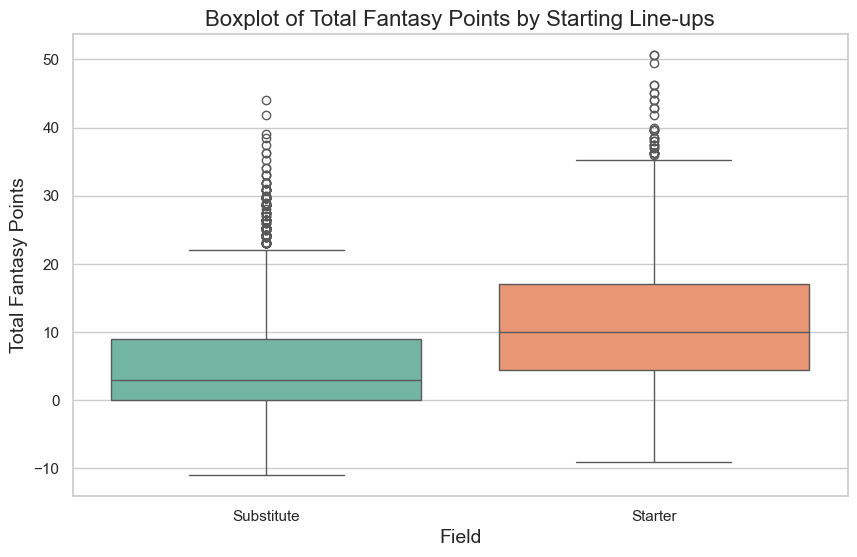

In [42]:
# Create a boxplot for total_fp across starting players
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsStarter', y='total_fp', data=all_players_stats, palette='Set2', hue='IsStarter', legend=False)
plt.title('Boxplot of Total Fantasy Points by Starting Line-ups', fontsize=16)
plt.xlabel('Field', fontsize=14)
plt.ylabel('Total Fantasy Points', fontsize=14)
plt.xticks(ticks=[0,1], labels=['Substitute','Starter'])
plt.show()

In [43]:
all_players_stats.iloc[324]

Season                                 2023
Gamecode                                 15
Home                                      0
Player_ID                        P006739   
IsStarter                               0.0
IsPlaying                               1.0
Team                                    VIR
Dorsal                                    6
Player                   PAJOLA, ALESSANDRO
Minutes                               10.92
Points                                    2
FieldGoalsMade2                           1
FieldGoalsAttempted2                      2
FieldGoalsMade3                           0
FieldGoalsAttempted3                      1
FreeThrowsMade                            0
FreeThrowsAttempted                       0
OffensiveRebounds                         1
DefensiveRebounds                         1
TotalRebounds                             2
Assistances                               1
Steals                                    0
Turnovers                       

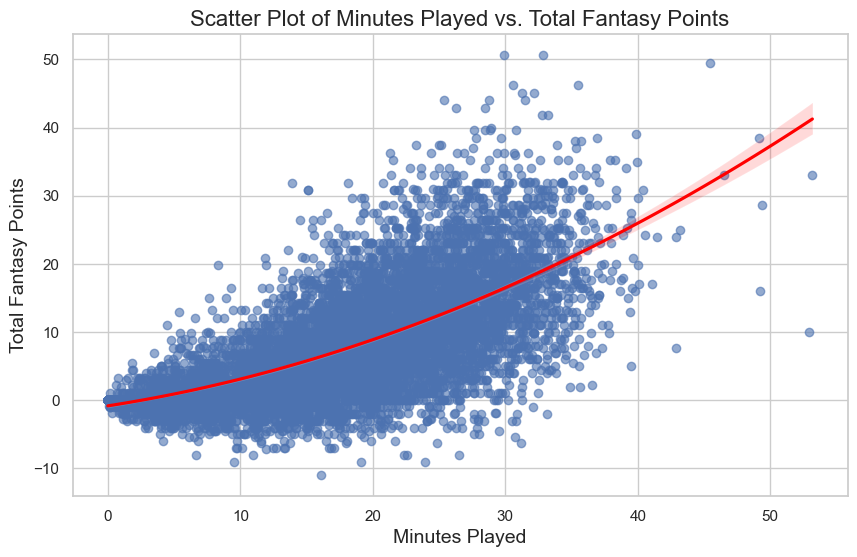

In [45]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Minutes', y='total_fp', data=all_players_stats, scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, order=2)

# Add titles and labels
plt.title('Scatter Plot of Minutes Played vs. Total Fantasy Points', fontsize=16)
plt.xlabel('Minutes Played', fontsize=14)
plt.ylabel('Total Fantasy Points', fontsize=14)

# Show the plot
plt.show()

In [47]:
# Extracting the Minutes and total_fp data
X = all_players_stats['Minutes']
y = all_players_stats['total_fp']

# Fit a quadratic polynomial (degree = 2)
coefficients = np.polyfit(X, y, deg=2)

# Print the coefficients
print(f"Coefficients of the quadratic fit:\n"
      f"Quadratic term (a): {coefficients[0]:.4f}\n"
      f"Linear term (b): {coefficients[1]:.4f}\n"
      f"Constant term (c): {coefficients[2]:.4f}")

Coefficients of the quadratic fit:
Quadratic term (a): 0.0092
Linear term (b): 0.3013
Constant term (c): -0.8212


### Minutes analysis with cluster

In [2]:
df_with_clusters = pd.read_csv('All_players_Clustered.csv')
df_with_clusters.head()

,Season,Gamecode,Home,Player_ID,IsStarter,IsPlaying,Team,Dorsal,Player,Minutes,...,Valuation,Plusminus,gamecode,group,datetime,TeamScore,OpponentScore,PlayerName,total_fp,Cluster
0,2023,1,1,P004720,0.0,1.0,RED,2,"LAZAREVIC, STEFAN",5.07,...,1,-1.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,S. Lazarevic,1.1,2.0
1,2023,1,1,PJDR,0.0,1.0,RED,4,"TEODOSIC, MILOS",14.62,...,-1,6.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,M. Teodosic,-0.9,2.0
2,2023,1,1,P005099,0.0,1.0,RED,5,"HANGA, ADAM",22.35,...,9,4.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,A. Hanga,9.9,2.0
3,2023,1,1,P002553,0.0,1.0,RED,9,"MITROVIC, LUKA",21.53,...,14,20.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,L. Mitrovic,15.4,1.0
4,2023,1,1,PLUO,1.0,0.0,RED,10,"LAZIC, BRANKO",12.77,...,8,7.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,B. Lazic,8.8,3.0


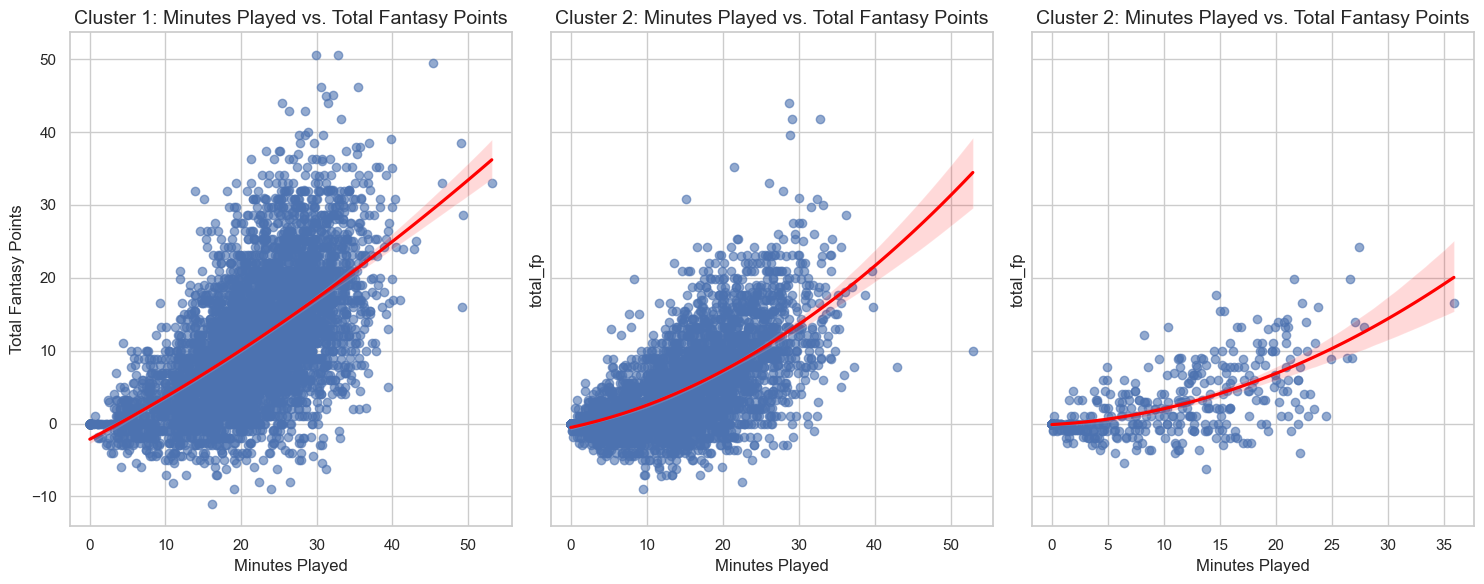

In [16]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

# Filter data for each cluster
cluster_1_data = df_with_clusters[df_with_clusters['Cluster'] == 1]
cluster_2_data = df_with_clusters[df_with_clusters['Cluster'] == 2]
cluster_3_data = df_with_clusters[df_with_clusters['Cluster'] == 3]

# Plot for Cluster 1
sns.regplot(
    x='Minutes', y='total_fp', data=cluster_1_data, ax=axes[0],
    scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, order=2
)
axes[0].set_title('Cluster 1: Minutes Played vs. Total Fantasy Points', fontsize=14)
axes[0].set_xlabel('Minutes Played', fontsize=12)
axes[0].set_ylabel('Total Fantasy Points', fontsize=12)

# Plot for Cluster 2
sns.regplot(
    x='Minutes', y='total_fp', data=cluster_2_data, ax=axes[1],
    scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, order=2
)
axes[1].set_title('Cluster 2: Minutes Played vs. Total Fantasy Points', fontsize=14)
axes[1].set_xlabel('Minutes Played', fontsize=12)

# Plot for Cluster 3
sns.regplot(
    x='Minutes', y='total_fp', data=cluster_3_data, ax=axes[2],
    scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, order=2
)
axes[2].set_title('Cluster 2: Minutes Played vs. Total Fantasy Points', fontsize=14)
axes[2].set_xlabel('Minutes Played', fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Minutes analysis in terms of previous matches

In [65]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize list to hold model results
model_results = []

# Function to compute adjusted R-squared
def adjusted_r2(r_squared, n, k):
    return 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

# MAPE calculation function with epsilon for division safety
def calculate_mape(y_true, y_pred):
    # Define a small constant to prevent division by zero
    epsilon = 1e-10
    y_true_safe = np.where(y_true == 0, epsilon, y_true)
    return np.median(np.abs((y_true - y_pred) / y_true_safe)) * 100

# Function to evaluate models and calculate metrics
def evaluate_model(data, feature, model_name, weights=None):
    X = data[[feature]].copy()
    X['square_term'] = X[feature] ** 2
    X = sm.add_constant(X)
    y = data['total_fp']
    
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    
    # Metrics calculations
    r_squared_adj = adjusted_r2(model.rsquared, X.shape[0], X.shape[1] - 1)
    mae = mean_absolute_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    mape = calculate_mape(y, predictions)
    
    # Append results to model_results
    model_results.append({
        "Model": model_name,
        "Nature": feature,
        "Weights": weights,
        "R_sq_adjusted": r_squared_adj,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": mape
    })

# Function to calculate moving averages with custom window and weights
def calculate_moving_averages(group, window, weights):
    group = group[group['Minutes'] > 0].copy()  # Only include games with minutes played > 0 and create a copy

    # Calculate the simple moving average (SMA) using the specified window
    sma_feature = f'minutes_played_sma_{window}'
    group.loc[:, sma_feature] = group['Minutes'].rolling(window=window).mean()

    # Calculate the weighted moving average (WMA) using the specified window and weights
    wma_feature = f'minutes_played_wma_{window}'
    if len(weights) != window:
        raise ValueError("Length of weights list must match the specified window size")

    group.loc[:, wma_feature] = group['Minutes'].rolling(window=window).apply(
        lambda x: np.dot(x, weights) if len(x) == window else np.nan, raw=True
    )
    
    # shift the features
    group[sma_feature] = group[sma_feature].shift(1)
    group[wma_feature] = group[wma_feature].shift(1)
    
    # Custom function to apply the imputation logic
    def impute_missing_values(group, sma_col, wma_col):
        median_minutes = group['Minutes'].median()
        
        for col in [sma_col, wma_col]:
            for idx, row in enumerate(group.itertuples(), 1):  # Starts idx at 1
                if pd.isna(getattr(row, col)):
                    if idx == 1:
                        group.at[row.Index, col] = median_minutes
                    else:
                        prior_minutes = group['Minutes'].iloc[:idx-1]  # Get previous (k-1) minutes
                        group.at[row.Index, col] = (prior_minutes.sum() + median_minutes) / idx

        return group

    # Apply custom imputation logic for missing values in sma and wma columns
    group = impute_missing_values(group, sma_feature, wma_feature)
    
    # Returning the modified group and weights for tracking
    return group, weights

# Define multiple windows and weights
windows_and_weights = [
    (2, [0.7, 0.3]),
    (3, [0.6, 0.3, 0.1]),  # First window and weights
    (4, [0.4, 0.3, 0.2, 0.1]),  # Second window and weights
    (5, [0.4, 0.25, 0.15, 0.12, 0.08]),
    (6, [0.25, 0.20, 0.18, 0.15, 0.12, 0.10])
]

windows_and_weights = [(k, [1.0 / k] * k) for k in range(1, 11)]

df_grouped = []

# Apply moving averages per player for each window/weight configuration
for window_size, custom_weights in windows_and_weights:
    for _, player_group in df_with_clusters.groupby('Player_ID'):
        player_group, weights_used = calculate_moving_averages(player_group, window=window_size, weights=custom_weights)
        df_grouped.append(player_group)
    
    # Concatenate all grouped data back into a single DataFrame
    df_with_moving_averages = pd.concat(df_grouped)

    # Drop rows with missing values in moving averages before model evaluation
    sma_feature = f'minutes_played_sma_{window_size}'
    wma_feature = f'minutes_played_wma_{window_size}'
    df_with_moving_averages.dropna(subset=[sma_feature, wma_feature], inplace=True)

    # Evaluate each model using different features
    
    evaluate_model(df_with_moving_averages, sma_feature, f'Model - {window_size} Window - SMA', weights='equal')
    #evaluate_model(df_with_moving_averages, wma_feature, f'Model - {window_size} Window - WMA', weights=weights_used)

# Finally, append the model with the actual minutes    
evaluate_model(df_with_moving_averages, 'Minutes', 'Model - Actual Minutes', weights=None)
# Convert model results to DataFrame and display
results_df = pd.DataFrame(model_results)
results_df


,Model,Nature,Weights,R_sq_adjusted,RMSE,MAE,MAPE
0,Model - 1 Window - SMA,minutes_played_sma_1,equal,0.157595,7.863654,6.174661,58.030436
1,Model - 2 Window - SMA,minutes_played_sma_2,equal,0.183536,7.741631,6.059256,57.340432
2,Model - 3 Window - SMA,minutes_played_sma_3,equal,0.196319,7.680787,6.001228,57.296916
3,Model - 4 Window - SMA,minutes_played_sma_4,equal,0.200235,7.662052,5.985306,56.954340
4,Model - 5 Window - SMA,minutes_played_sma_5,equal,0.201547,7.655762,5.968094,57.213559
5,Model - 6 Window - SMA,minutes_played_sma_6,equal,0.204200,7.643035,5.954514,57.237181
6,Model - 7 Window - SMA,minutes_played_sma_7,equal,0.204625,7.640994,5.949658,57.194352
7,Model - 8 Window - SMA,minutes_played_sma_8,equal,0.206219,7.633331,5.939699,57.079166
8,Model - 9 Window - SMA,minutes_played_sma_9,equal,0.207298,7.628141,5.935724,57.129256
9,Model - 10 Window - SMA,minutes_played_sma_10,equal,0.207877,7.625358,5.935789,57.174238


In [55]:
# Function to calculate moving averages with custom window and weights
def calculate_moving_averages(group, window, weights):
    group = group[group['Minutes'] > 0].copy()  # Only include games with minutes played > 0 and create a copy

    # Calculate the simple moving average (SMA) using the specified window
    sma_feature = f'minutes_played_sma_{window}'
    group.loc[:, sma_feature] = group['Minutes'].rolling(window=window).mean()

    # Calculate the weighted moving average (WMA) using the specified window and weights
    wma_feature = f'minutes_played_wma_{window}'
    if len(weights) != window:
        raise ValueError("Length of weights list must match the specified window size")

    group.loc[:, wma_feature] = group['Minutes'].rolling(window=window).apply(
        lambda x: np.dot(x, weights) if len(x) == window else np.nan, raw=True
    )
    
    # shift the features
    group[sma_feature] = group[sma_feature].shift(1)
    group[wma_feature] = group[wma_feature].shift(1)
    
    # Custom function to apply the imputation logic
    def impute_missing_values(group, sma_col, wma_col):
        median_minutes = group['Minutes'].median()
        
        for col in [sma_col, wma_col]:
            for idx, row in enumerate(group.itertuples(), 1):  # Starts idx at 1
                if pd.isna(getattr(row, col)):
                    if idx == 1:
                        group.at[row.Index, col] = median_minutes
                    else:
                        prior_minutes = group['Minutes'].iloc[:idx-1]  # Get previous (k-1) minutes
                        group.at[row.Index, col] = (prior_minutes.sum() + median_minutes) / idx

        return group

    # Apply custom imputation logic for missing values in sma and wma columns
    group = impute_missing_values(group, sma_feature, wma_feature)
    
    # Returning the modified group and weights for tracking
    return group, weights

# Apply moving averages per player with custom window and weights
# Example usage with a 3-game window and custom weights
window_size = 4
custom_weights = [0.4, 0.3, 0.2, 0.1]
df_grouped = []

for _, player_group in df_with_clusters.groupby('Player_ID'):
    player_group, weights_used = calculate_moving_averages(player_group, window=window_size, weights=custom_weights)
    df_grouped.append(player_group)

In [46]:
(df_grouped[189].Minutes.iloc[1]+df_grouped[189].Minutes.iloc[2]+df_grouped[189].Minutes.iloc[3])/3

21.04

In [56]:
df_grouped[189].filter(['datetime', 'Player', 'Minutes','minutes_played_sma_4', 'minutes_played_wma_4'])

,datetime,Player,Minutes,minutes_played_sma_4,minutes_played_wma_4
126,2023-10-06 19:45:00,"DORSEY, TYLER",30.42,16.725000,16.725000
401,2023-10-13 20:30:00,"DORSEY, TYLER",24.55,23.572500,23.572500
1043,2023-10-27 20:30:00,"DORSEY, TYLER",16.00,23.898333,23.898333
1101,2023-11-02 18:45:00,"DORSEY, TYLER",22.57,21.923750,21.923750
1374,2023-11-09 20:30:00,"DORSEY, TYLER",28.27,23.385000,24.990000
1589,2023-11-14 20:45:00,"DORSEY, TYLER",22.30,22.847500,21.961000
1707,2023-11-16 20:05:00,"DORSEY, TYLER",14.08,22.285000,21.055000
2145,2023-11-30 18:45:00,"DORSEY, TYLER",17.73,21.805000,23.377000
2538,2023-12-06 20:30:00,"DORSEY, TYLER",18.52,20.595000,22.587000
2704,2023-12-08 20:30:00,"DORSEY, TYLER",30.40,18.157500,18.542000


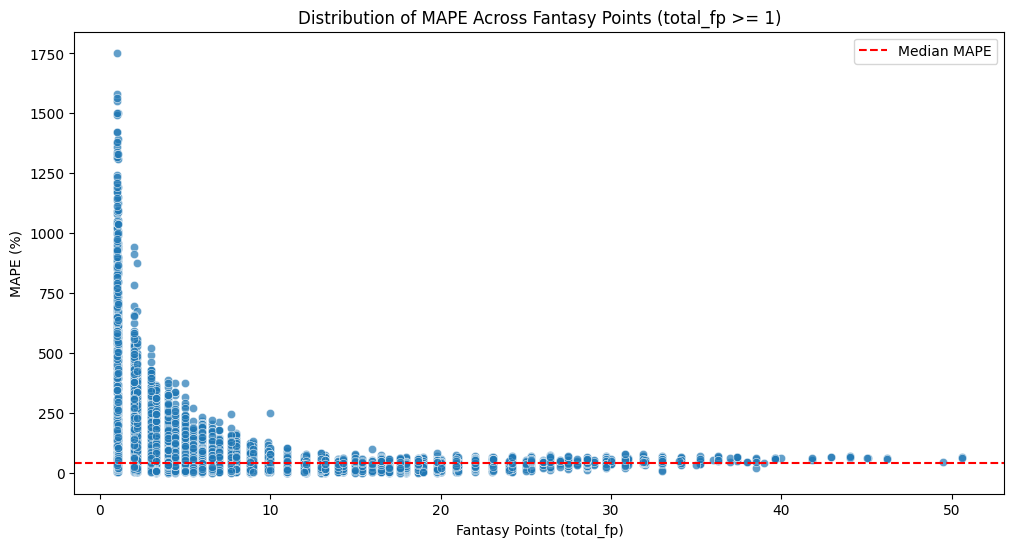

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data to include only players with total_fp >= 1
data_filtered = df_with_moving_averages[df_with_moving_averages['total_fp'] >= 1].copy()

# Calculate predictions based on the original model
X = data_filtered[['Minutes']].copy()
X['square_term'] = X['Minutes'] ** 2
X = sm.add_constant(X)
y = data_filtered['total_fp']
predictions = sm.OLS(y, X).fit().predict(X)

# Calculate MAPE for each data point
data_filtered['MAPE'] = np.abs((y - predictions) / y) * 100

# Plot the distribution of MAPE across fantasy points
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_fp', y='MAPE', data=data_filtered, alpha=0.7)
plt.title('Distribution of MAPE Across Fantasy Points (total_fp >= 1)')
plt.xlabel('Fantasy Points (total_fp)')
plt.ylabel('MAPE (%)')
plt.axhline(y=data_filtered['MAPE'].median(), color='red', linestyle='--', label='Median MAPE')
plt.legend()
plt.show()
